# EDA on German Cars

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploring the Data

In [3]:
GC_df = pd.read_csv('gcar_data.csv')
GC_df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,75721,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,80184,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,19864,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,76699,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,92991,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"


In [4]:
GC_df.drop(columns = 'Unnamed: 0' , inplace = True)

In [5]:
GC_df.shape

(100000, 14)

In [6]:
GC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     100000 non-null  object 
 1   model                     100000 non-null  object 
 2   color                     99924 non-null   object 
 3   registration_date         99999 non-null   object 
 4   year                      100000 non-null  object 
 5   price_in_euro             100000 non-null  object 
 6   power_kw                  99925 non-null   object 
 7   power_ps                  99928 non-null   object 
 8   transmission_type         100000 non-null  object 
 9   fuel_type                 100000 non-null  object 
 10  fuel_consumption_l_100km  88761 non-null   object 
 11  fuel_consumption_g_km     100000 non-null  object 
 12  mileage_in_km             99932 non-null   float64
 13  offer_description         100000 non-null  ob

## Cleaning the Data

In [7]:
def is_float(string):
    if string.replace(".", "").isnumeric():
        return True
    else:
        return False

In [8]:
to_float = ['price_in_euro', 'power_kw', 'power_ps']
GC_df[to_float] = GC_df[to_float].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [9]:
GC_df.isnull().sum()

brand                           0
model                           0
color                          76
registration_date               1
year                            0
price_in_euro                  54
power_kw                      116
power_ps                       93
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    11239
fuel_consumption_g_km           0
mileage_in_km                  68
offer_description               0
dtype: int64

In [10]:
GC_df['fuel_consumption_l_100km'].dropna(inplace = True)

In [11]:
GC_df['fuel_consumption_l_100km'] = GC_df['fuel_consumption_l_100km'].dropna().apply(lambda x : x.split(' ')[0]).apply(lambda x : x.replace(',','.'))

In [12]:
GC_df['fuel_consumption_l_100km'] = GC_df['fuel_consumption_l_100km'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [13]:
GC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     100000 non-null  object 
 1   model                     100000 non-null  object 
 2   color                     99924 non-null   object 
 3   registration_date         99999 non-null   object 
 4   year                      100000 non-null  object 
 5   price_in_euro             99946 non-null   float64
 6   power_kw                  99884 non-null   float64
 7   power_ps                  99907 non-null   float64
 8   transmission_type         100000 non-null  object 
 9   fuel_type                 100000 non-null  object 
 10  fuel_consumption_l_100km  88329 non-null   float64
 11  fuel_consumption_g_km     100000 non-null  object 
 12  mileage_in_km             99932 non-null   float64
 13  offer_description         100000 non-null  ob

In [14]:
GC_df.drop(columns = 'offer_description', inplace = True)

In [15]:
GC_df.isnull().sum()

brand                           0
model                           0
color                          76
registration_date               1
year                            0
price_in_euro                  54
power_kw                      116
power_ps                       93
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    11671
fuel_consumption_g_km           0
mileage_in_km                  68
dtype: int64

In [16]:
mean_value = GC_df['fuel_consumption_l_100km'].mean()
GC_df['fuel_consumption_l_100km'].fillna(value=mean_value, inplace=True)

In [17]:
GC_df.dropna(inplace=True)

In [18]:
GC_df.isnull().sum()

brand                       0
model                       0
color                       0
registration_date           0
year                        0
price_in_euro               0
power_kw                    0
power_ps                    0
transmission_type           0
fuel_type                   0
fuel_consumption_l_100km    0
fuel_consumption_g_km       0
mileage_in_km               0
dtype: int64

In [19]:
GC_df['year'] = GC_df['year'].astype('int')

In [20]:
GC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99752 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     99752 non-null  object 
 1   model                     99752 non-null  object 
 2   color                     99752 non-null  object 
 3   registration_date         99752 non-null  object 
 4   year                      99752 non-null  int64  
 5   price_in_euro             99752 non-null  float64
 6   power_kw                  99752 non-null  float64
 7   power_ps                  99752 non-null  float64
 8   transmission_type         99752 non-null  object 
 9   fuel_type                 99752 non-null  object 
 10  fuel_consumption_l_100km  99752 non-null  float64
 11  fuel_consumption_g_km     99752 non-null  object 
 12  mileage_in_km             99752 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 10.7+ MB


In [21]:
GC_df.nunique()

brand                          29
model                         589
color                          14
registration_date             344
year                           29
price_in_euro               11585
power_kw                      452
power_ps                      452
transmission_type               4
fuel_type                      11
fuel_consumption_l_100km      315
fuel_consumption_g_km         907
mileage_in_km               34445
dtype: int64

## Visualization for the Data

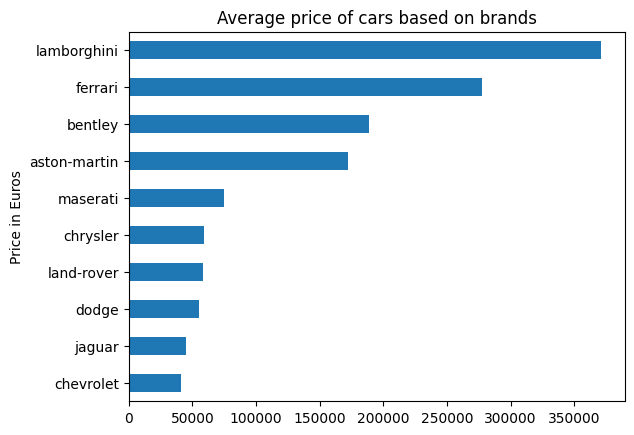

In [22]:
GC_df.groupby('brand').mean()['price_in_euro'].sort_values().tail(10).plot(kind = 'barh')
plt.ylabel('Price in Euros')
plt.title('Average price of cars based on brands');

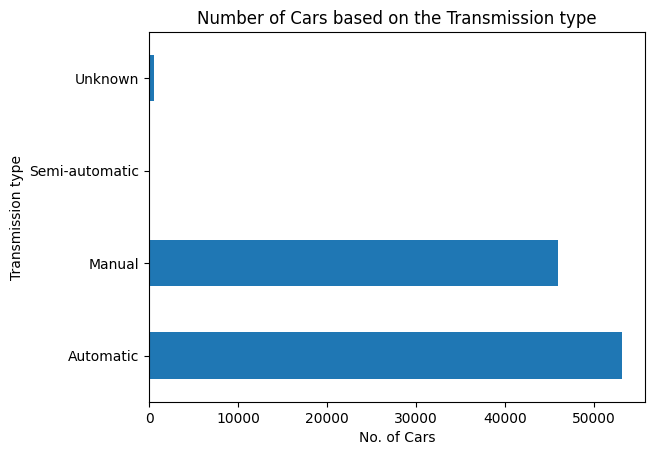

In [23]:
GC_df.groupby('transmission_type')['model'].count().plot(kind = 'barh')
plt.xlabel('No. of Cars')
plt.ylabel('Transmission type')
plt.title('Number of Cars based on the Transmission type');

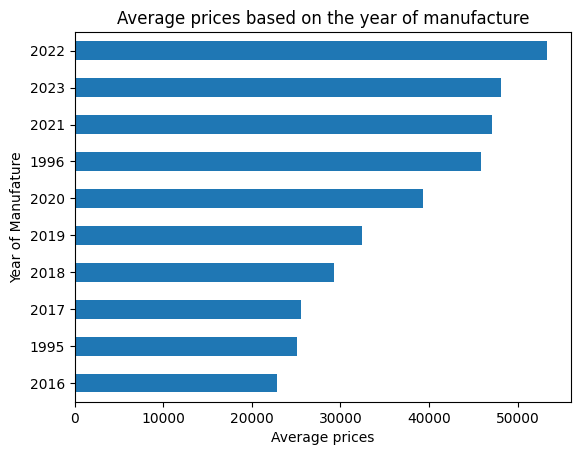

In [24]:
GC_df.groupby('year').mean()['price_in_euro'].sort_values().tail(10).plot(kind = 'barh')
plt.xlabel('Average prices')
plt.ylabel('Year of Manufature')
plt.title('Average prices based on the year of manufacture');

''

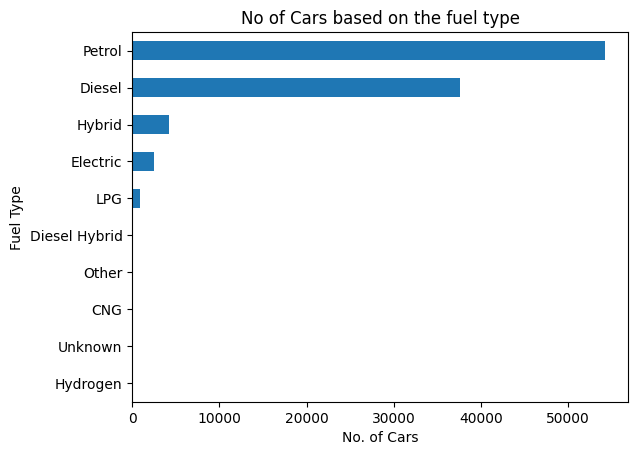

In [25]:
GC_df.groupby('fuel_type')['model'].count().sort_values().tail(10).plot(kind = 'barh')
plt.xlabel('No. of Cars')
plt.ylabel('Fuel Type')
plt.title('No of Cars based on the fuel type')
;

''

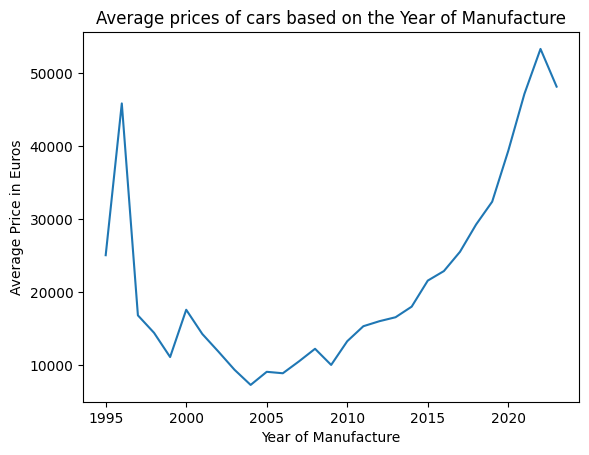

In [26]:
GC_df.groupby('year')['price_in_euro'].mean().sort_index().plot(kind = 'line')
plt.xlabel('Year of Manufacture')
plt.ylabel('Average Price in Euros')
plt.title('Average prices of cars based on the Year of Manufacture')
;

## Statistical Model to predict Cars' Prices

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
target = 'price_in_euro'

y = GC_df[target]
X = GC_df.drop(columns=target)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3 , random_state=42)
pipe = make_pipeline(OneHotEncoder(drop='first', handle_unknown='ignore'), LinearRegression())
pipe.fit(X_train , y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore')),
                ('linearregression', LinearRegression())])

In [54]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true=y_test , y_pred = pipe.predict(X_test))

/Users/amrgamea/opt/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 3, 5, 6, 9, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


1458181989.5031636

/Users/amrgamea/opt/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 3, 5, 6, 9, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


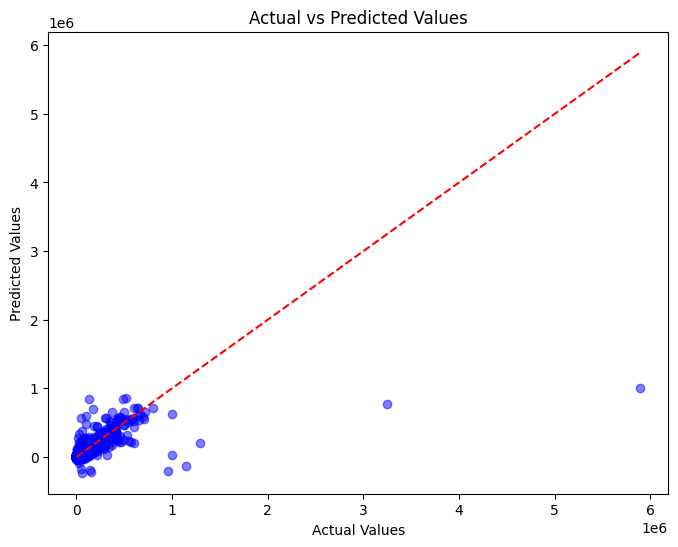

In [55]:
y_pred = pipe.predict(X_test)

# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()